In [1]:
# http://127.0.0.1:8888/?token=d8645dfa36d67d3f2ca03610ce0c3c8e01cc36bd6dfab090
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='chesterish')
% matplotlib inline

# XGBoost
***

# CV Parameters
***

In [52]:
model_name = 'xgb'
append_info = 'forward_window_postscale_cv'

parameter_grid = [['window_size', (32, 34, 36, 40, 42, 44, 46, 48)],
                  ['valid_rate', (0.075, 0.1, 0.125, 0.15, 0.166, 0.175, 0.2)],
                  ['n_cv', (7, 8, 9, 10, 11, 12, 13, 15, 18, 20)]]

n_param = len(parameter_grid)
n_value = 1
param_name = []
for i in range(n_param):
    param_name.append(parameter_grid[i][0])
    n_value *= len(parameter_grid[i][1])

param_value = np.zeros((n_param, n_value)).tolist()
global value_list
global value_col
value_list = []
value_col = 0

def generate_value_matrix_(idx_param):
    idx_param_next = idx_param + 1
    for value in parameter_grid[idx_param][1]:
        global value_list
        value_list.append(value)
        if idx_param_next < n_param:
            generate_value_matrix_(idx_param_next)
        else:
            global value_col
            for i_row, row in enumerate(param_value):
                row[value_col] = value_list[i_row]
            value_col += 1
        value_list.pop()

generate_value_matrix_(0)

cv, vr, ws = param_value[2], param_value[1], param_value[0]

color = ['r', 'b', 'g', 'y', 'k', 'm', 'gray', 'pink', 'cyan', 'gold', 'blueviolet']
marker = ['', '>', '<', '^', 's', 'd', '.', 'h']
data = []
labels = []

idx = 1
train_seed = 999
cv_seed = 95
path = '../boost_round_outputs/' + model_name + '/' + model_name + '_'+ append_info + '/' + model_name + '_cv_vr_ws/'
last = '_t-'+ str(train_seed) + '_c-' + str(cv_seed) + '_log.csv'
data = []
label = []
for i in range(len(cv)):
#     print('{}_cv-{}_vr-{}_ws-{}'.format(model_name,str(cv[i]), str(vr[i]), str(ws[i])))
    data.append(pd.read_csv(path + '{}_cv-{}_vr-{}_ws-{}'.format(model_name,str(cv[i]), str(vr[i]), str(ws[i]))
                            +'/final_logs/' + model_name + '_idx-1' + last))
    label.append('{}_cv-{}_vr-{}_ws-{}'.format(model_name,str(cv[i]), str(vr[i]), str(ws[i])))

def draw(ax_, delta):
    
    i_color = 0
    i_marker = 0
    for i in range(70):
        iter_ = i + delta * 70
        ax.plot(data[iter_]['valid_loss'], color=color[i_color], label=str(iter_) + '_' + label[iter_], marker=marker[i_marker])
        if (i_color+1)%10 == 0:
            i_color = 0
            i_marker += 1
        else:
            i_color += 1

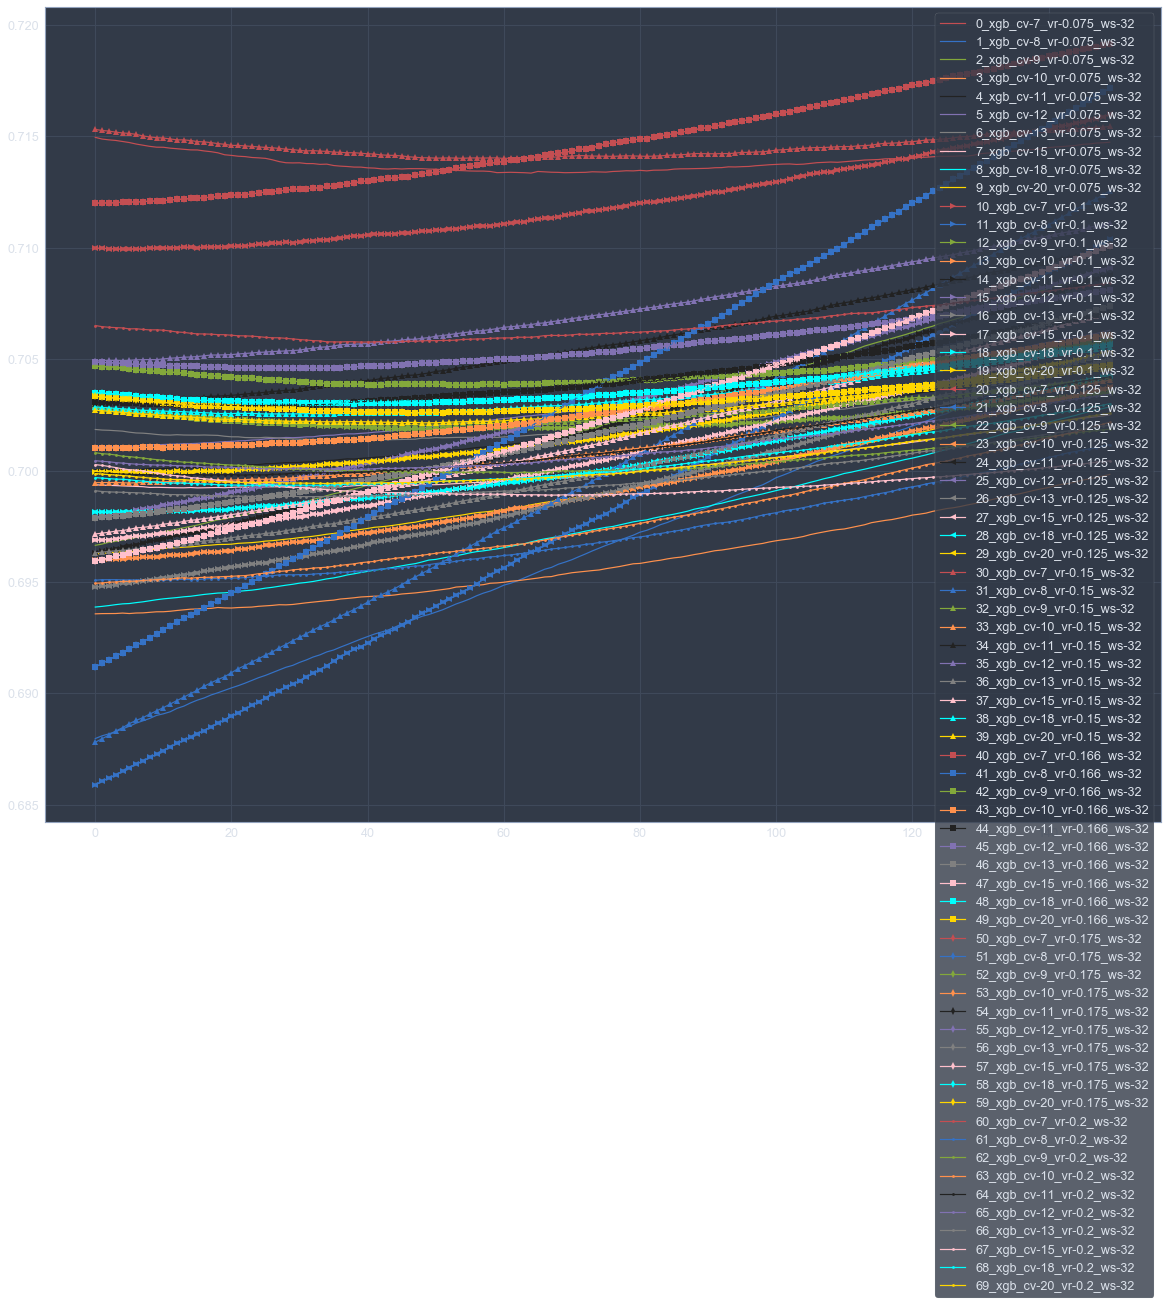

In [53]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

draw(ax, 0)

ax.legend(loc='best')
# plt.ylim(0.685, 0.70)
# plt.xlim(0, 125)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

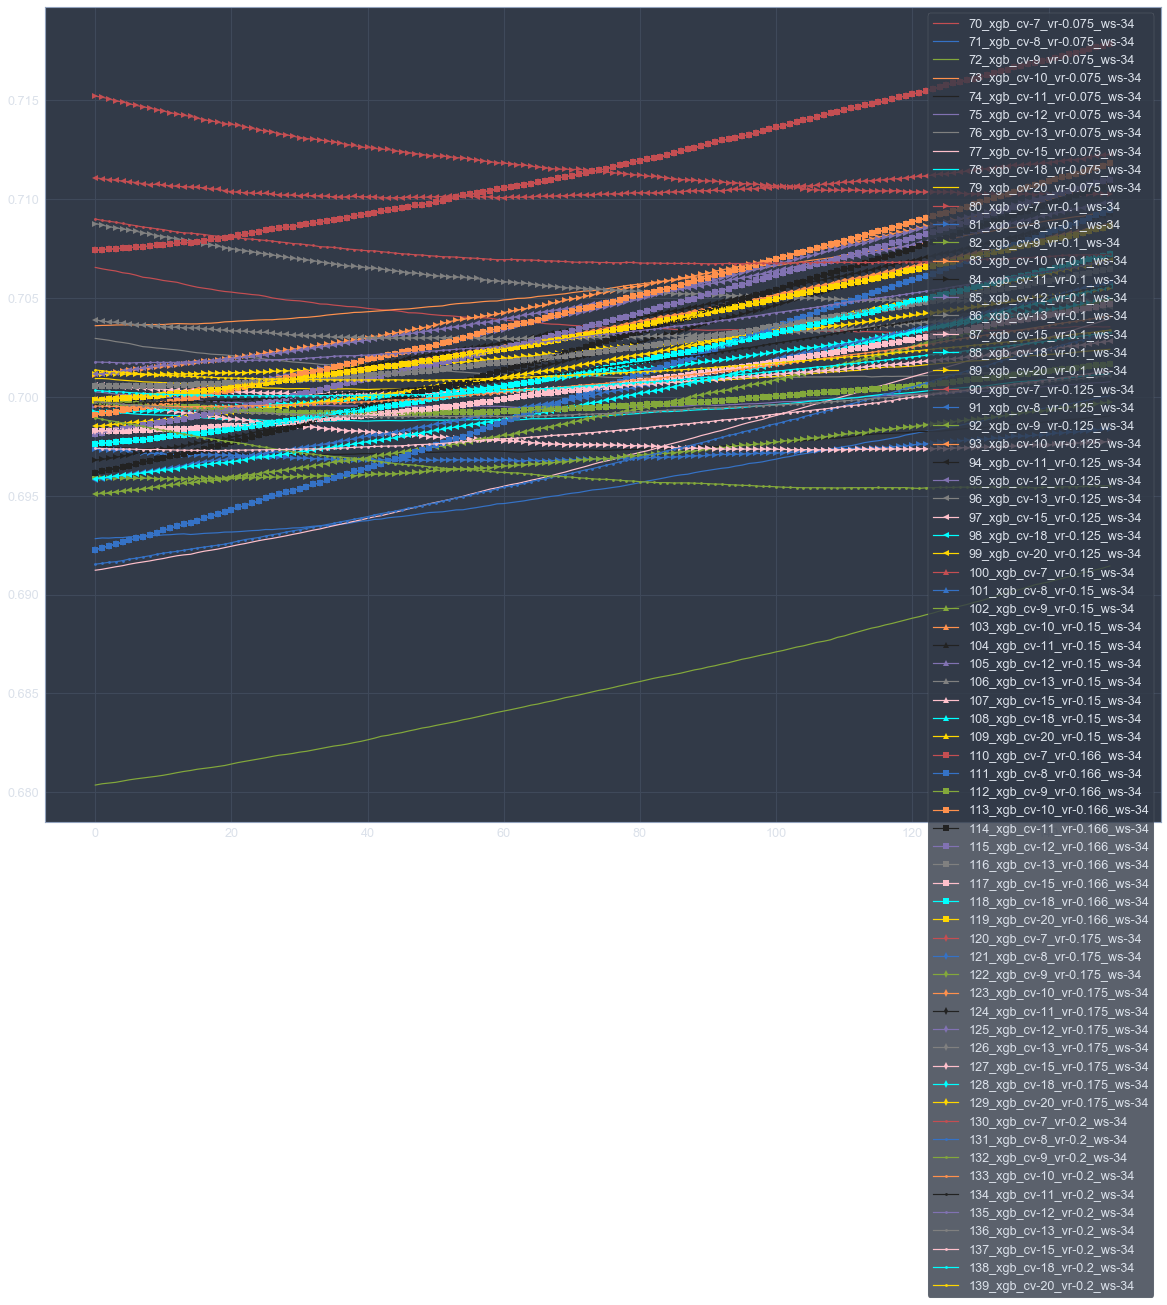

In [54]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

draw(ax, 1)

ax.legend(loc='best')
# plt.ylim(0.691, 0.698)
# plt.xlim(0, 125)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

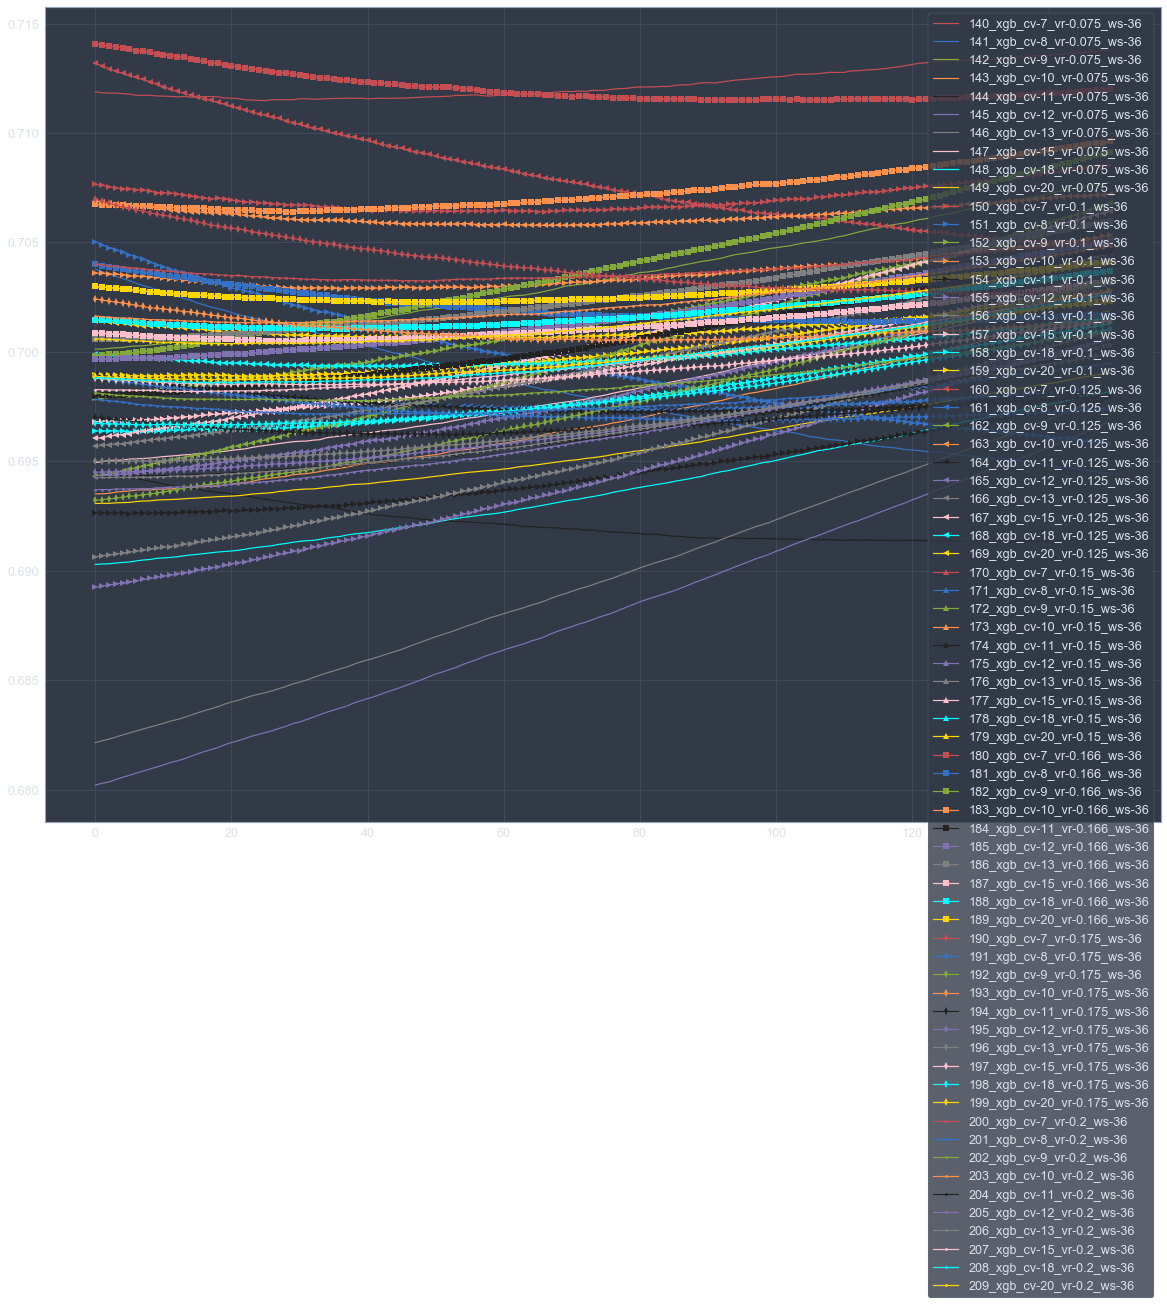

In [55]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

draw(ax, 2)

ax.legend(loc='best')
# plt.ylim(0.685, 0.70)
# plt.xlim(0, 125)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

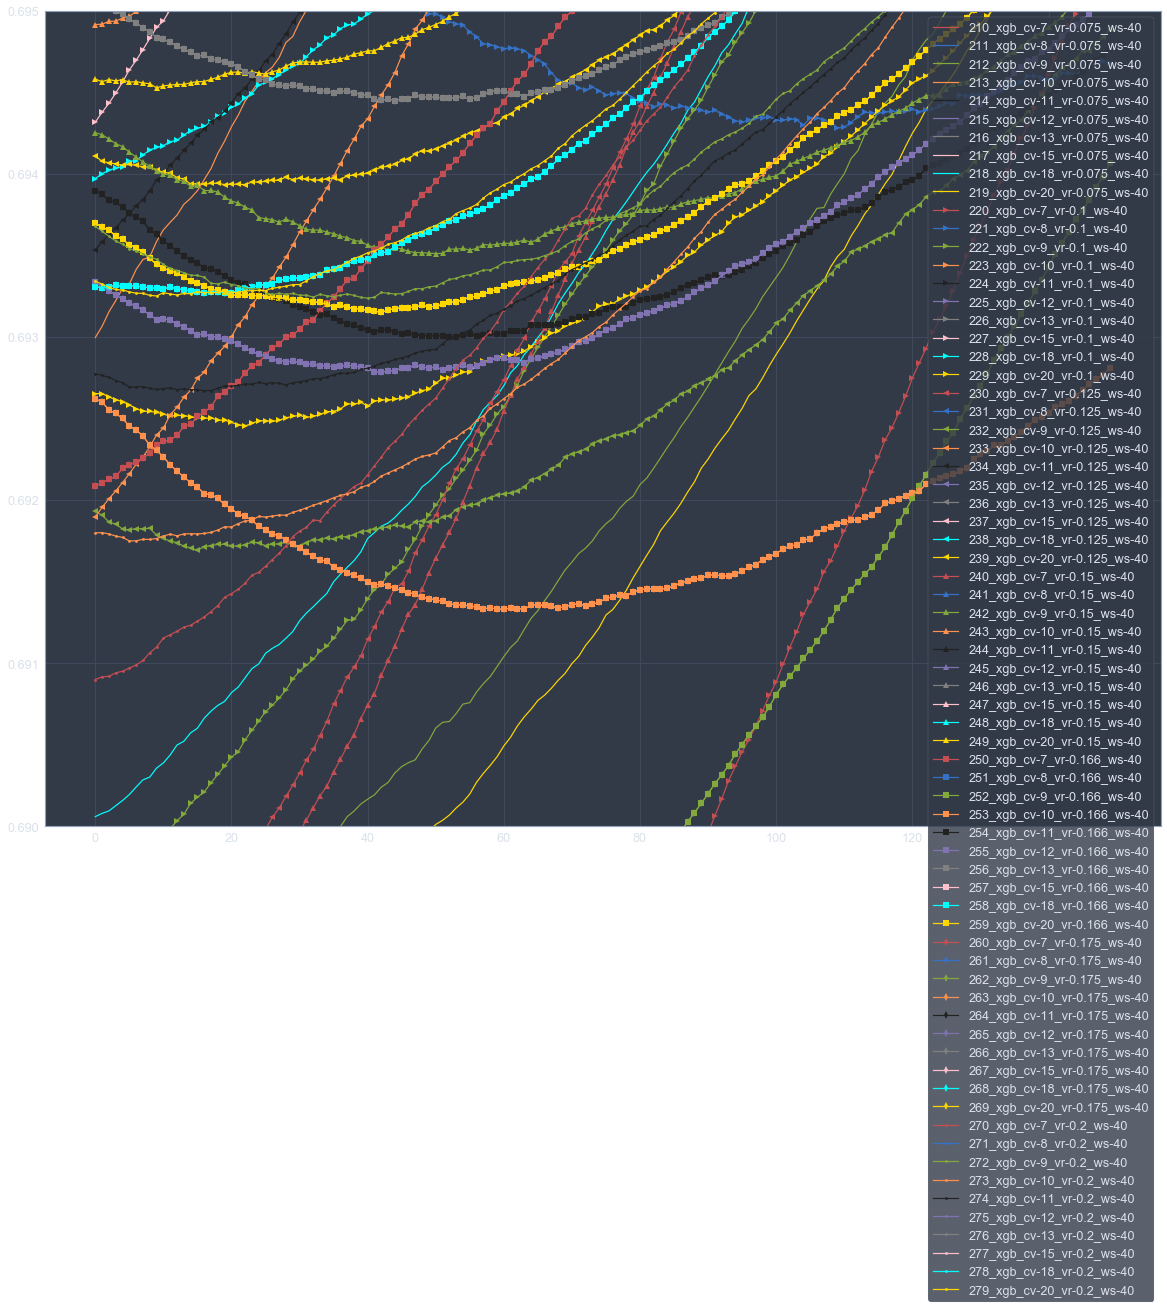

In [61]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

draw(ax, 3)

ax.legend(loc='best')
plt.ylim(0.690, 0.695)
# plt.xlim(0, 125)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

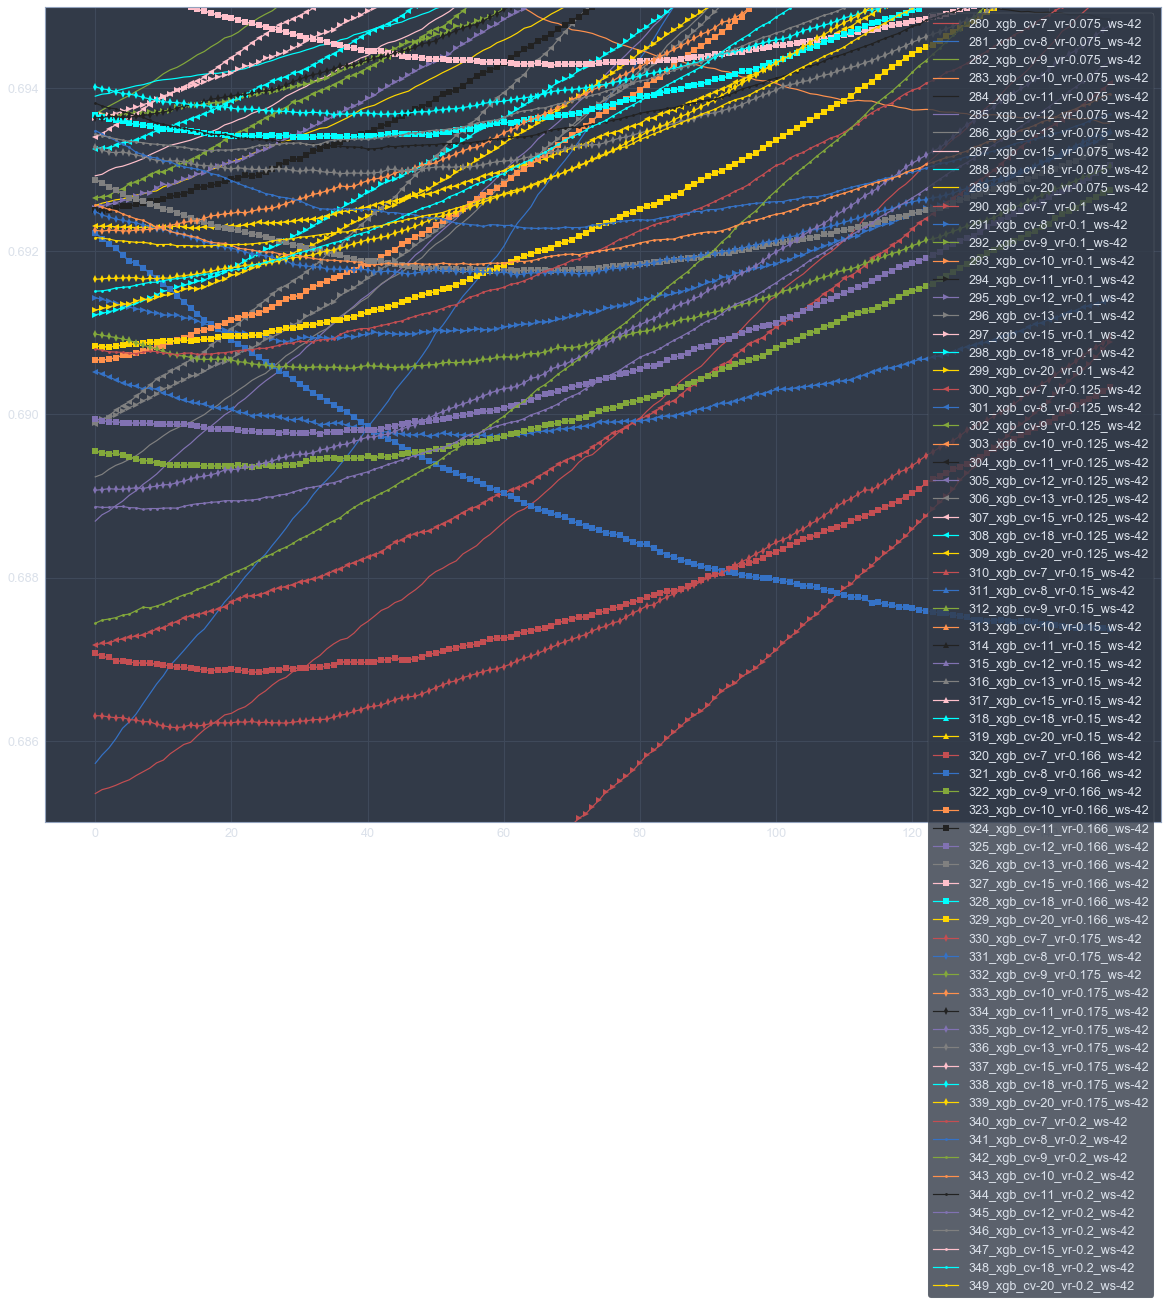

In [62]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

draw(ax, 4)

ax.legend(loc='best')
plt.ylim(0.685, 0.695)
# plt.xlim(0, 125)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

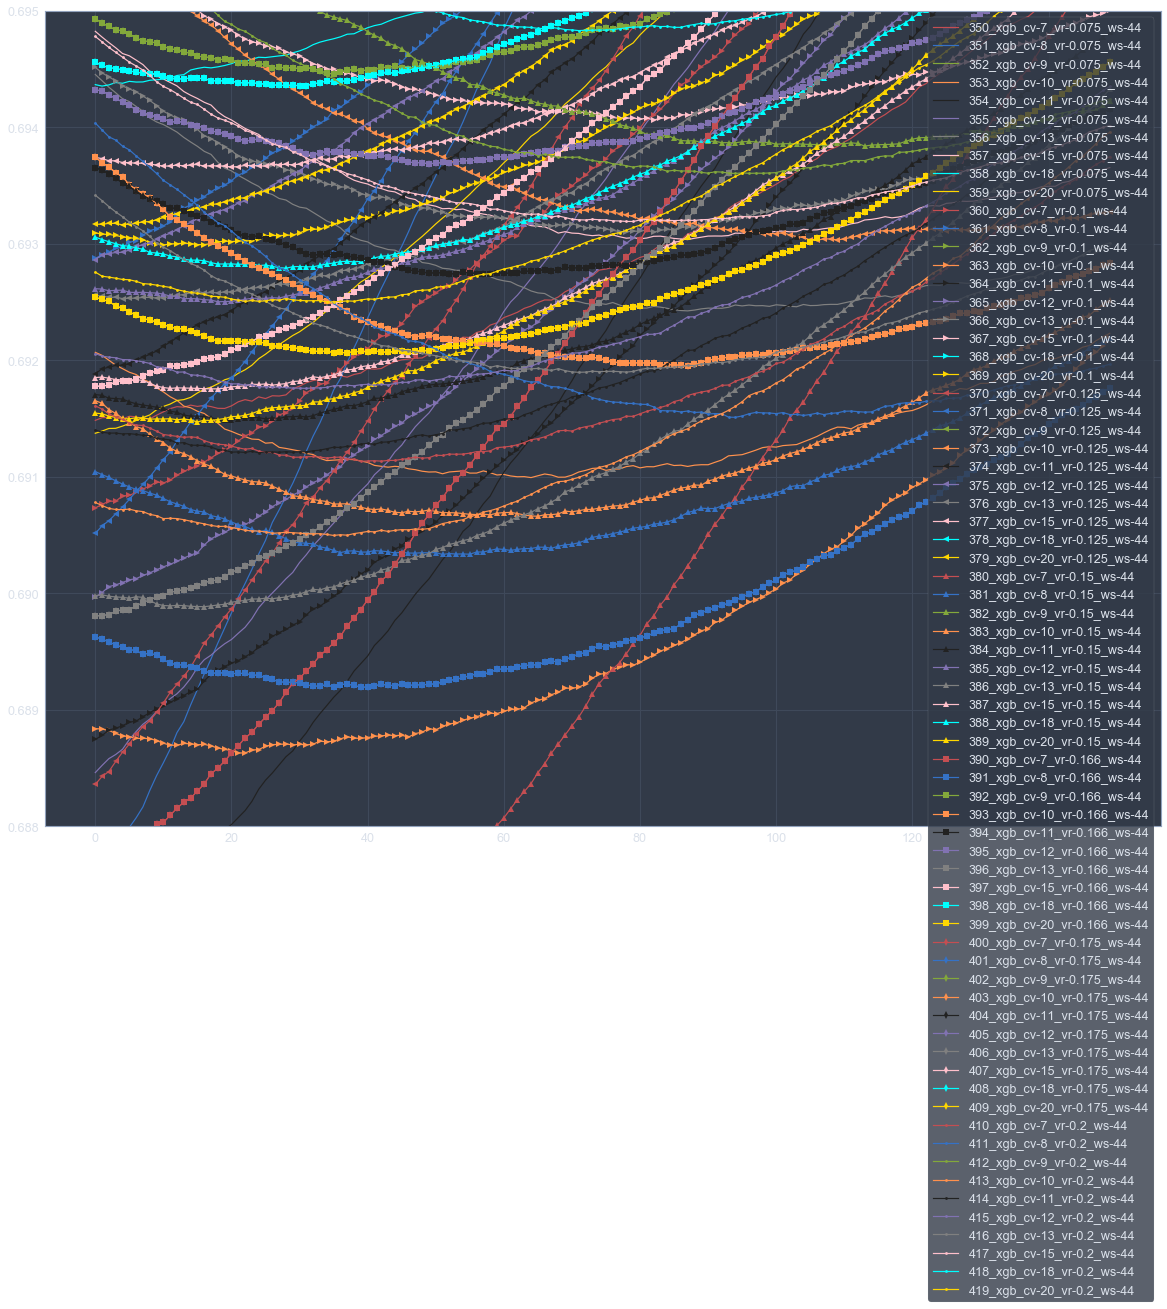

In [63]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

draw(ax, 5)

ax.legend(loc='best')
plt.ylim(0.688, 0.695)
# plt.xlim(0, 125)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

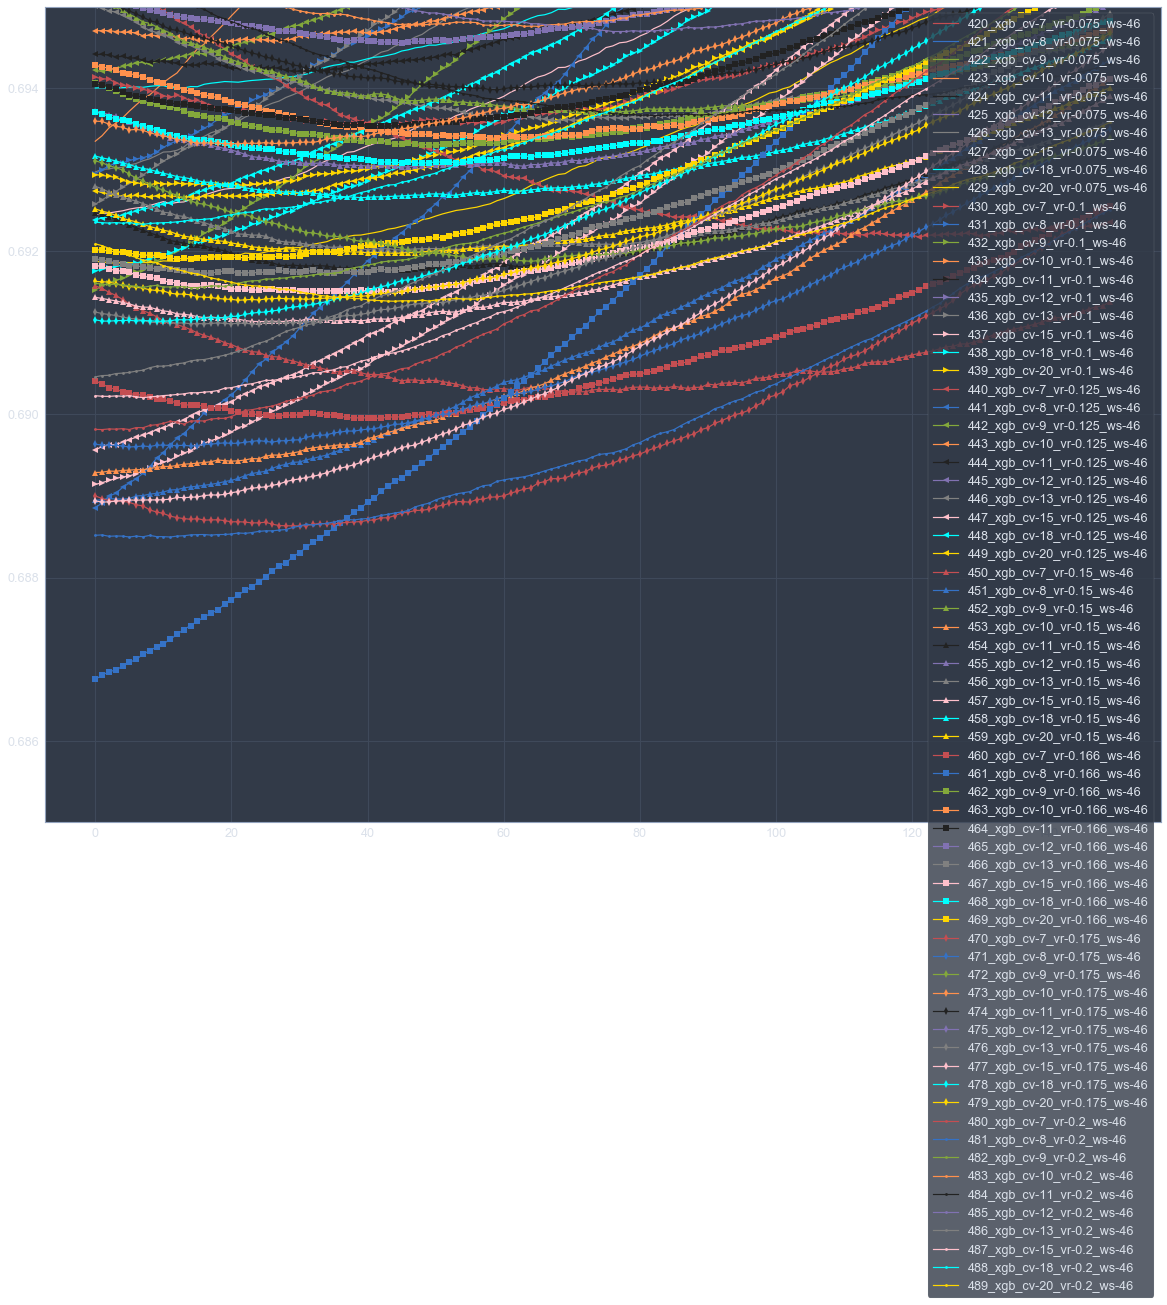

In [64]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

draw(ax, 6)

ax.legend(loc='best')
plt.ylim(0.685, 0.695)
# plt.xlim(0, 125)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

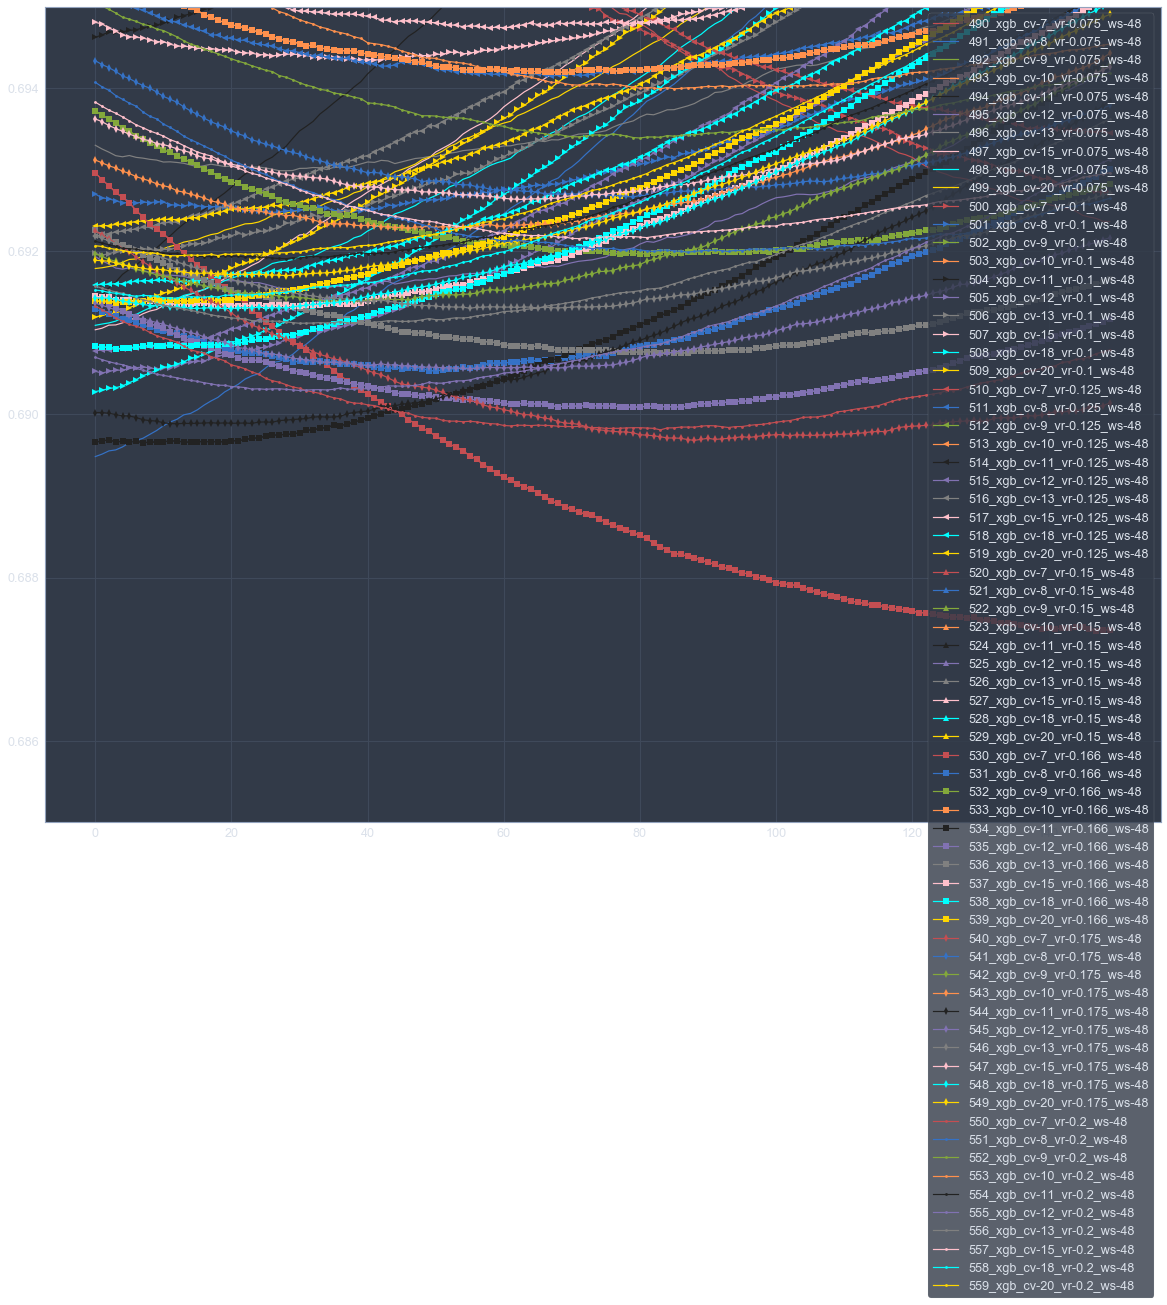

In [66]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

draw(ax, 7)

ax.legend(loc='best')
plt.ylim(0.685, 0.695)
# plt.xlim(0, 125)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

## Best CV Parameters
***

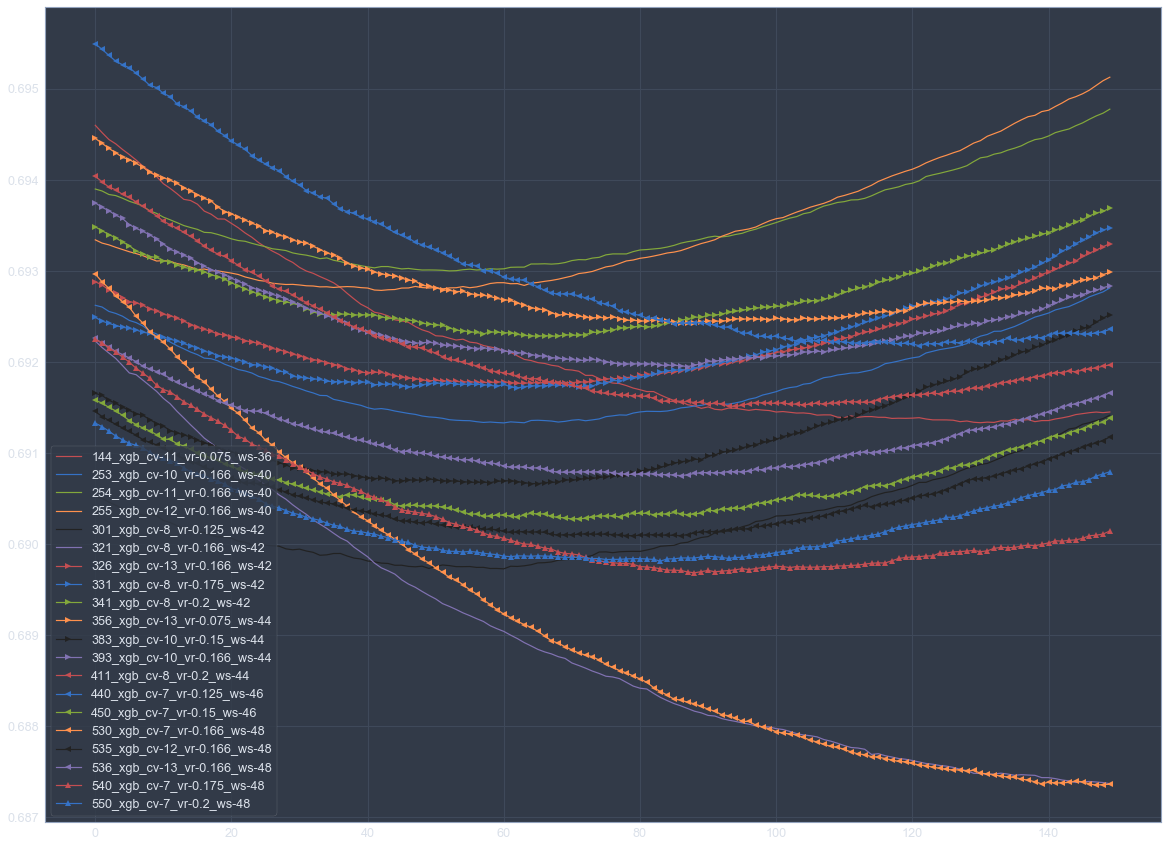

In [67]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

draw_list = [144, 253, 254, 255, 301, 321, 326, 331, 341, 356, 383, 393, 411, 440 ,450, 530, 535, 536, 540, 550]

i_color = 0
i_marker = 0
for i in draw_list:
    ax.plot(data[i]['valid_loss'], color=color[i_color], label=str(i) + '_' + label[i], marker=marker[i_marker])
    if (i_color+1)%6 == 0:
        i_color = 0
        i_marker += 1
    else:
        i_color += 1

ax.legend(loc='best')
# plt.ylim(0.684, 0.690)
# plt.xlim(0, 125)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

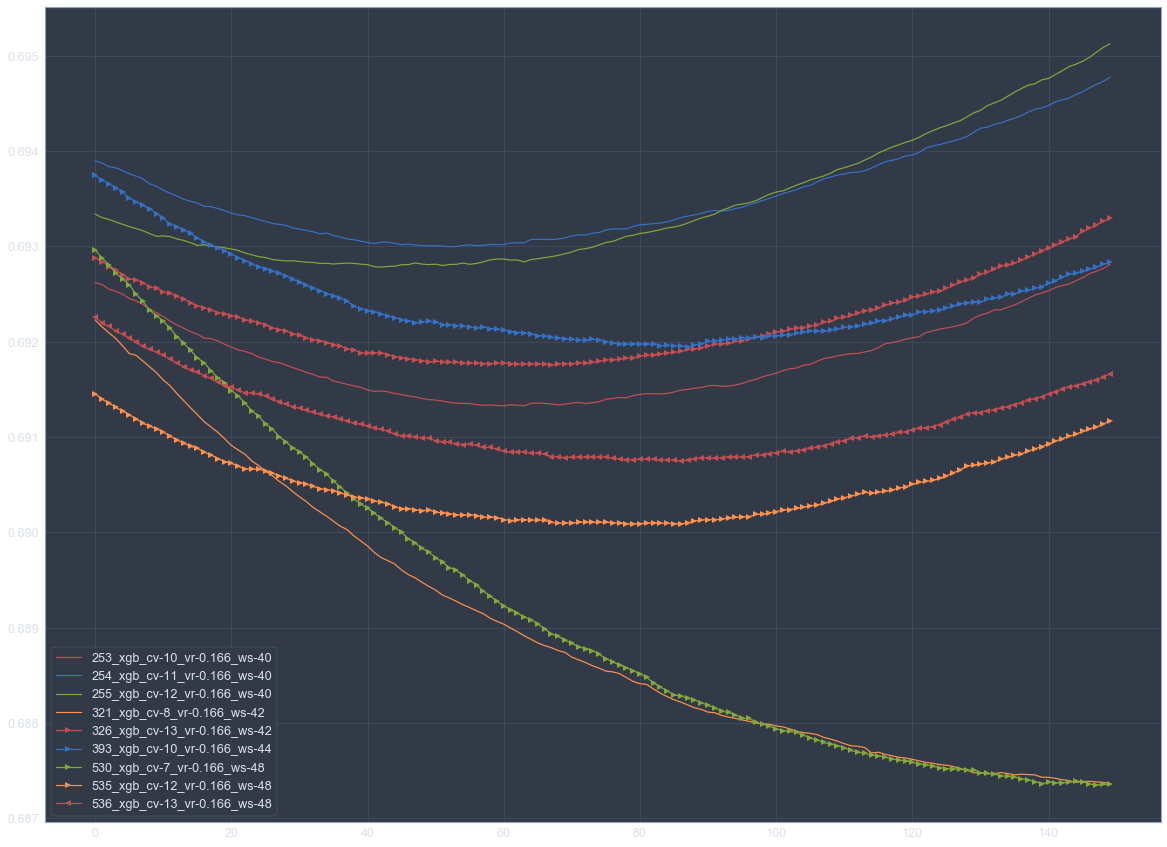

In [68]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

draw_list = [253, 254, 255, 321, 326, 393, 530, 535, 536]

i_color = 0
i_marker = 0
for i in draw_list:
    ax.plot(data[i]['valid_loss'], color=color[i_color], label=str(i) + '_' + label[i], marker=marker[i_marker])
    if (i_color+1)%4 == 0:
        i_color = 0
        i_marker += 1
    else:
        i_color += 1

ax.legend(loc='best')
# plt.ylim(0.684, 0.690)
# plt.xlim(0, 125)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

# Model Parameters
***

In [ ]:
model_name = 'xgb'
append_info = 'xgb_increase_postscale'
param_name = 'lr'
param_values = [0.003]
color = ['r', 'b', 'g', 'y', 'k', 'm', 'gray']
marker_list = ['_', 'x', '>', ',', '=']
data = []
labels = []

idx = 1
train_seed = 999
cv_seed = 95
for param_value in param_values:
    data.append(pd.read_csv('../boost_round_outputs/' + model_name + '/' 
                            + model_name + '_'+ append_info + '/'
                            + model_name + '_'+ param_name + '/'
                            + model_name + '_'+ param_name+ '-' + str(param_value) 
                            + '/final_logs/' + model_name + '_idx-' + str(idx) 
                            + '_t-'+ str(train_seed) + '_c-' + str(cv_seed) + '_log.csv'))
    labels.append(param_name + '-' + str(param_value) + '-' + str(idx))

# append_info = 'forward_increase_weights'
# for param_value in param_values:
#     data.append(pd.read_csv('../boost_round_outputs/' + model_name + '/' 
#                             + model_name + '_'+ append_info + '/'
#                             + model_name + '_'+ param_name + '/'
#                             + model_name + '_'+ param_name+ '-' + str(param_value) 
#                             + '/final_logs/' + model_name + '_idx-' + str(idx) 
#                             + '_t-'+ str(train_seed) + '_c-' + str(cv_seed) + '_log.csv'))
#     labels.append(param_name + '-' + str(param_value) + '-' + str(idx))   
    
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
i_marker = -1
i_color = 0
for i, label in enumerate(labels):
    if (i)%(len(param_values)) == 0:
        i_marker += 1
        i_color = 0
    ax.plot(data[i]['valid_loss'], color=color[i_color], label=label, marker=marker_list[i_marker])
    i_color += 1
ax.legend(loc='best')
# plt.ylim(0.6908, 0.6912)
# plt.xlim(100, 150)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

## max_depth
***

In [ ]:
  model_name = 'xgb'
append_info = 'xgb_increase_postscale'
# append_info = 'forward_window'
param_name = 'bfq'
param_values = [1, 3, 5, 7, 9, 11]
color = ['r', 'b', 'g', 'y', 'k', 'm', 'gray']
marker_list = ['_', 'x', '>', ',', '=']
data = []
labels = []

idx = 1
train_seed = 66
cv_seed = 113
for param_value in param_values:
    data.append(pd.read_csv('../boost_round_outputs/lgb/lgb_'+ append_info 
                            + '/lgb_'+ param_name+ 
                            '/lgb_'+ param_name+ '-' + str(param_value) 
                            + '/final_logs/lgb_idx-' + str(idx) 
                            + '_t-'+ str(train_seed) + '_c-' + str(cv_seed) + '_log.csv'))
    labels.append(param_name + '-' + str(param_value) + '-' + str(idx))
    
# idx = 2
# train_seed = 634
# cv_seed = 614
# for param_value in param_values:
#     data.append(pd.read_csv('../boost_round_outputs/lgb/lgb_'+ append_info 
#                             + '/lgb_'+ param_name+ 
#                             '/lgb_'+ param_name+ '-' + str(param_value) 
#                             + '/final_logs/lgb_idx-' + str(idx) 
#                             + '_t-'+ str(train_seed) + '_c-' + str(cv_seed) + '_log.csv'))
#     labels.append(param_name + '-' + str(param_value) + '-' + str(idx))
    
# idx = 3
# train_seed = 547
# cv_seed = 707
# for param_value in param_values:
#     data.append(pd.read_csv('../boost_round_outputs/lgb/lgb_'+ append_info 
#                             + '/lgb_'+ param_name+ 
#                             '/lgb_'+ param_name+ '-' + str(param_value) 
#                             + '/final_logs/lgb_idx-' + str(idx) 
#                             + '_t-'+ str(train_seed) + '_c-' + str(cv_seed) + '_log.csv'))
#     labels.append(param_name + '-' + str(param_value) + '-' + str(idx))

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
i_marker = -1
i_color = 0
for i, label in enumerate(labels):
    if (i)%(len(param_values)) == 0:
        i_marker += 1
        i_color = 0
    ax.plot(data[i]['valid_loss'], color=color[i_color], label=label, marker=marker_list[i_marker])
    i_color += 1
ax.legend(loc='best')
# plt.ylim(0.6908, 0.6912)
# plt.xlim(100, 150)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
i_marker = -1
i_color = 0
for i, label in enumerate(labels):
    if (i)%(len(param_values)) == 0:
        i_marker += 1
        i_color = 0
    ax.plot(data[i]['train_loss'], color=color[i_color], label=label, marker=marker_list[i_marker])
    i_color += 1
ax.legend(loc='best')
# plt.ylim(0.665, 0.680)
# plt.xlim(100, 150)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

In [ ]:
idx = 2
train_seed = 634
cv_seed = 614
data = []
labels = []
for param_value in param_values:
    data.append(pd.read_csv('../boost_round_outputs/lgb/lgb_'+ append_info 
                            + '/lgb_'+ param_name+ 
                            '/lgb_'+ param_name+ '-' + str(param_value) 
                            + '/final_logs/lgb_idx-' + str(idx) 
                            + '_t-'+ str(train_seed) + '_c-' + str(cv_seed) + '_log.csv'))
    labels.append(param_name + '-' + str(param_value) + '-' + str(idx))

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
i_marker = -1
i_color = 0
for i, label in enumerate(labels):
    if (i)%(len(param_values)) == 0:
        i_marker += 1
        i_color = 0
    ax.plot(data[i]['valid_loss'], color=color[i_color], label=label, marker=marker_list[i_marker])
    i_color += 1
ax.legend(loc='best')
# plt.ylim(0.6908, 0.6912)
# plt.xlim(100, 150)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

In [ ]:
idx = 3
train_seed = 547
cv_seed = 707
data = []
labels = []
for param_value in param_values:
    data.append(pd.read_csv('../boost_round_outputs/lgb/lgb_'+ append_info 
                            + '/lgb_'+ param_name+ 
                            '/lgb_'+ param_name+ '-' + str(param_value) 
                            + '/final_logs/lgb_idx-' + str(idx) 
                            + '_t-'+ str(train_seed) + '_c-' + str(cv_seed) + '_log.csv'))
    labels.append(param_name + '-' + str(param_value) + '-' + str(idx))
    
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
i_marker = -1
i_color = 0
for i, label in enumerate(labels):
    if (i)%(len(param_values)) == 0:
        i_marker += 1
        i_color = 0
    ax.plot(data[i]['valid_loss'], color=color[i_color], label=label, marker=marker_list[i_marker])
    i_color += 1
ax.legend(loc='best')
# plt.ylim(0.6908, 0.6912)
# plt.xlim(100, 150)
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()